### Importing the packages/libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Loading the data

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")
print(df.head())  # Show first 5 rows


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


### Feature selection

In [ ]:
# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
# Scale the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Find optimal number of clusters

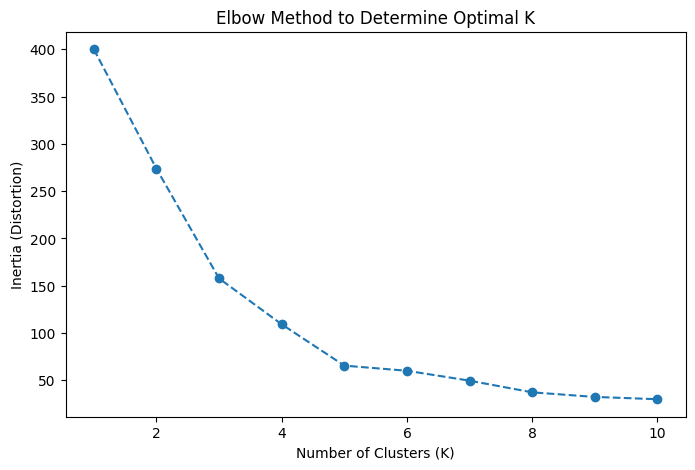

In [ ]:
# Try different K values
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Distortion)")
plt.title("Elbow Method to Determine Optimal K")
plt.show()


Typically, the best K is around 3-5 clusters.

### Apply K-Means clustering

In [ ]:
# Apply K-Means with optimal K (let’s say K=4 based on the Elbow Method)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


### Visualize the clusters

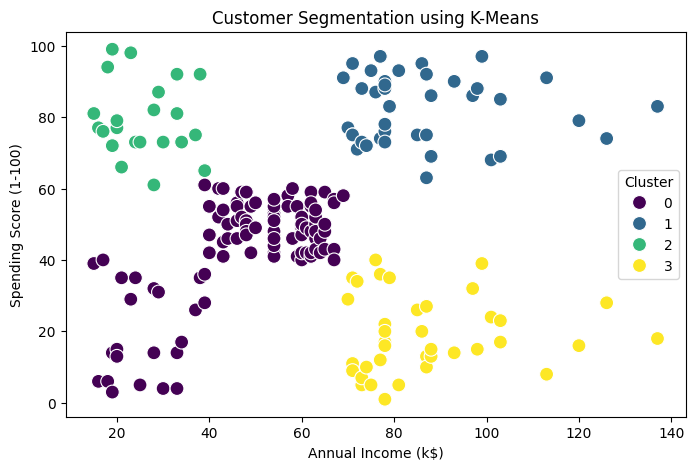

In [ ]:
# Scatter plot of the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend(title="Cluster")
plt.show()


 **Interpretation:**

* Cluster 1 → High income, high spending (VIP customers)
* Cluster 2 → Low income, high spending (Impulse buyers)
* Cluster 3 → Low income, low spending (Budget customers)
* Cluster 4 → High income, low spending (Careful spenders)

**Business Insights (How a Retail Store Can Use This)**

* VIP Customers → Offer premium loyalty programs.
* Impulse Buyers → Target with discounts & flash sales.
* Budget Customers → Provide budget-friendly product recommendations.
* Careful Spenders → Offer cashback & savings plans.